In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data

Date        Close         Open         High          Low     PE
0     1960-01-04    59.910000    59.910000    59.910000    59.910000  18.34
1     1960-01-05    60.389999    60.389999    60.389999    60.389999  18.34
2     1960-01-06    60.130001    60.130001    60.130001    60.130001  18.34
3     1960-01-07    59.689999    59.689999    59.689999    59.689999  18.34
4     1960-01-08    59.500000    59.500000    59.500000    59.500000  18.34
...          ...          ...          ...          ...          ...    ...
15350 2020-12-24  3703.060000  3694.030000  3703.820000  3689.320000  33.77
15351 2020-12-28  3735.360000  3723.030000  3740.510000  3723.030000  33.77
15352 2020-12-29  3727.040000  3750.010000  3756.120000  3723.310000  33.77
15353 2020-12-30  3732.040000  3736.190000  3744.630000  3730.210000  33.77
15354 2020-12-31  3756.070000  3733.270000  3760.200000  3726.880000  33.77

[15355 rows x 6 columns]

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

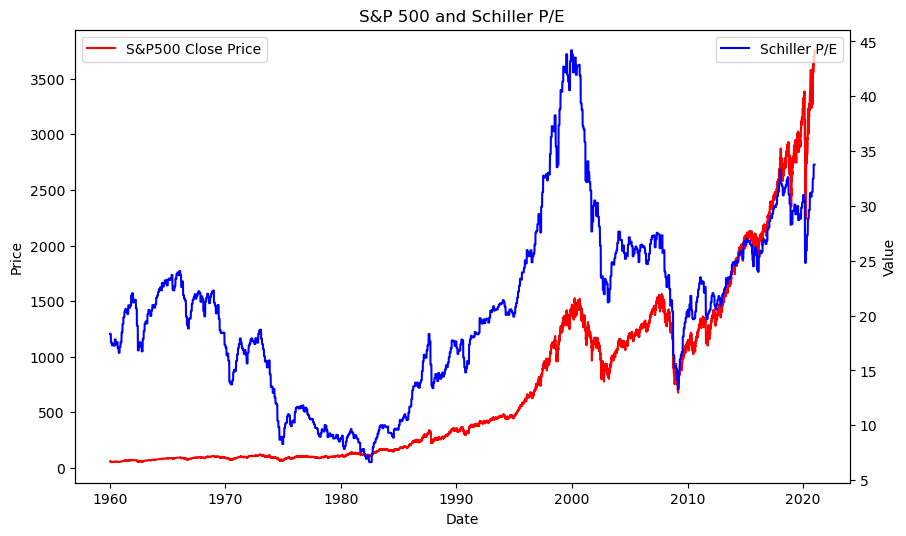

In [93]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(data.Date, data.Close.values, 'red', label = 'S&P500 Close Price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
ax2=plt.twinx()
ax2.plot(data.Date, data.PE.values, 'blue', label = 'Schiller P/E')
ax2.set_ylabel("Value")
plt.legend()

plt.title("S&P 500 and Schiller P/E")
plt

In [77]:
step2_data = data[['Close','PE']].values
step2_data

array([[  59.91    ,   18.34    ],
       [  60.389999,   18.34    ],
       [  60.130001,   18.34    ],
       ...,
       [3727.04    ,   33.77    ],
       [3732.04    ,   33.77    ],
       [3756.07    ,   33.77    ]])

In [78]:
step2_date_data = data['Date'].values
step2_date_data

array(['1960-01-04T00:00:00.000000000', '1960-01-05T00:00:00.000000000',
       '1960-01-06T00:00:00.000000000', ...,
       '2020-12-29T00:00:00.000000000', '2020-12-30T00:00:00.000000000',
       '2020-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [85]:
window_size = 28
corr_array = []
corr_date_array = []
for i in range(step2_data.shape[0]-window_size + 1):
    x = step2_data[i:i+window_size, 0]
    y = step2_data[i:i+window_size, 1]
    corr = np.corrcoef(x, y)
    corr_array.append(corr[0, 1])
    corr_date_array.append(step2_date_data[i+window_size - 1])
# corr_array = np.array(corr_array)
len(corr_array)

15328

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

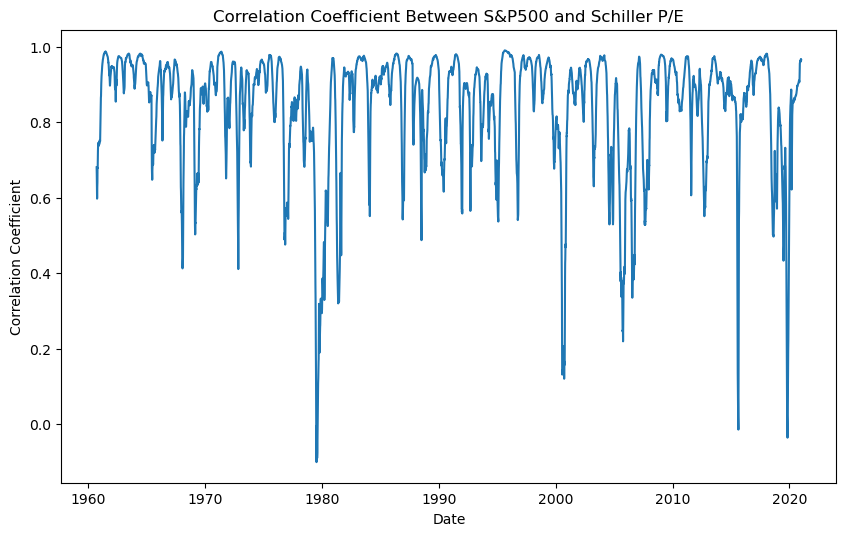

In [82]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(corr_date_array, corr_array, label = 'Corr')
plt.xlabel("Date")
plt.ylabel("Correlation Coefficient")
plt.title("Correlation Coefficient Between S&P500 and Schiller P/E")
plt

In [118]:
sell_point_array = []
sell_point_date_array = []
label_set = np.zeros([len(corr_array), 1])
for i in range(len(corr_array)):
    if (corr_array[i] >= 0.9 and corr_array[i] <= 1):
        sell_point_array.append(corr_array[i])
        sell_point_date_array.append(corr_date_array[i])
        label_set[i] = 1
len(sell_point_date_array)

263

In [119]:
dataset = data[['Close']].values
date = data['Date'].values
dataset.shape

(15355, 1)

In [113]:
cnn_full_dataset = []
for i in range(data.shape[0]-window_size + 1):
    cnn_dataset = dataset[i:i+window_size]
    cnn_full_dataset.append(cnn_dataset)
cnn_full_dataset = np.array(cnn_full_dataset)
cnn_full_dataset.shape

(15328, 28, 1)

In [112]:
label_set.shape

(15328, 1)

In [117]:
date_list = np.array(corr_date_array)
date_list.shape

(15328,)